# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "李澤諺"
student_id = "B05902023"

---

# Exercise 2

---

## Kepler's equation

### In celestial mechanics, _**Kepler’s equation**_
### $$M = E - e\,\sin(E)$$
### relates the mean anomaly $M$ to the eccentric anomaly $E$ of an elliptical orbit of eccentricity $e$, where $0 < e < 1$, see [ _Wiki website_ ](https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion) for the details.

---

### 1. Prove that fixed-point iteration using the iteration function 
### $$g(E) = M + e\,\sin(E)$$
### is convergent locally.
\[Hint: You may use Ostrowski’s Theorem mentioned in the lecture note.\]

### proof.

令 $h(E) = g(E) - E = M + esinE - E$，$\forall\ E \in \mathbb{R}$  
取 $a \in \mathbb{R}$ 且 $a > M + e$，則有 $h(a) = M + esina - a < M + esina - (M + e) = e(sina - 1) \le 0$  
取 $b \in \mathbb{R}$ 且 $b < M - e$，則有 $h(b) = M + esinb - b > M + esinb - (M - e) = e(sinb + 1) \ge 0$  
因為 $h(E) = M + esinE - E$ 在 $[a, b]$ 上連續，且 $h(a) < 0 < h(b)$  
所以由Intermediate Value Theorem，可得 $\exists\ c \in (a, b)$，使得 $h(c) = g(c) - c = 0$  
即 $g(c) = c$，由此可知 $g$ 存在fixed point  
接著，令 $\alpha$ 為 $g$ 的一個fixed point  
因為 $g \in C^{1}(\mathbb{R})$，且 $\forall\ E \in \mathbb{R}$，皆有 $|g'(E)| = |\frac{d}{dE}(M + esinE)| = |ecosE| \le e < 1$  
因此由Ostrowski's Theorem，可知 $\exists\ \delta > 0$，使得 $\forall\ \{x_n\} \subset \mathbb{R}$，若 $|x_0 - \alpha| < \delta$，則 $\{x_n\}$ 會converge到 $\alpha$  
因此可得 $g$ 會locally converge

---


### 2. Use the fixed-point iteration scheme in "Q.1" to solve Kepler’s equation for the eccentric anomaly $E$ corresponding to a mean anomaly $M = \dfrac{2\pi}{3}$ and an eccentricity $e = 0.5$.

---

### Part 0. Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Define the fixed point function

In [3]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    x = x_0
    iteration = 0
    history = {'estimation' : [] , 'error' : []}
    while True:
        error = abs(func(x) - x)
        
        history['estimation'].append(x)
        history['error'].append(error)
        
        iteration += 1
        if (iteration >= max_iterations or error < tolerance):
            return (x , history) if report_history else x
        
        x = func(x)

Test your implementaion with the assertion below.

In [4]:
root = fixed_point(lambda x: x - (x**2 - 4*x + 3.5), 2, tolerance=1e-7, max_iterations=100, report_history=False)

error = np.inf
for solution in np.roots([1, -4, 3.5]):
    if abs(root - solution) < error:
        exact_solution = solution
        error = abs(root - solution)

assert error < 1e-7

### Part 2. Assign values to variables anomaly mean "_M_" and eccentricity  "_e_".

### $$M = \frac{2\pi}{3}\,\,\,\,\,\text{and}\,\,\,\,\,e = 0.5$$

In [5]:
M = 2 * np.pi / 3
e = 0.5

In [6]:
print('M =', M)
print('e =', e)


M = 2.0943951023931953
e = 0.5


### Part 3. Define the function of Kepler’s equation
<br>

#### _**Recall Kepler’s equation**_ :
#### $$M = E - e\,\sin(E).$$
#### So we let the function $f(E) = E - e\,\sin(E) - M$, then
#### $$g(E) = E - f(E) = M + e\,\sin(E)$$

#### For the instance:

If we want to implement "$\sin(x)$", we will call `np.sin(x)` with numpy in python.


In [7]:
def f(E):
    return E - e * np.sin(E) - M

def g(E):
    return M + e * np.sin(E)

In [8]:
print('M =', M)

# f(0) = -M, g(0) = M
print('f(0) =', f(0))
print('g(0) =', g(0))


M = 2.0943951023931953
f(0) = -2.0943951023931953
g(0) = 2.0943951023931953


### Part 4. Plot the function $f(E)$ and $g(E)$

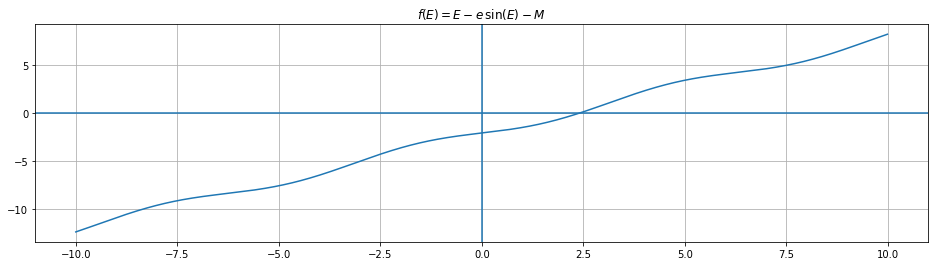

In [9]:
fig, ax = plt.subplots(figsize=(16, 4))
search_range = np.arange(-10, 10, 0.01)
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(E) = E - e\,\sin(E) - M$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

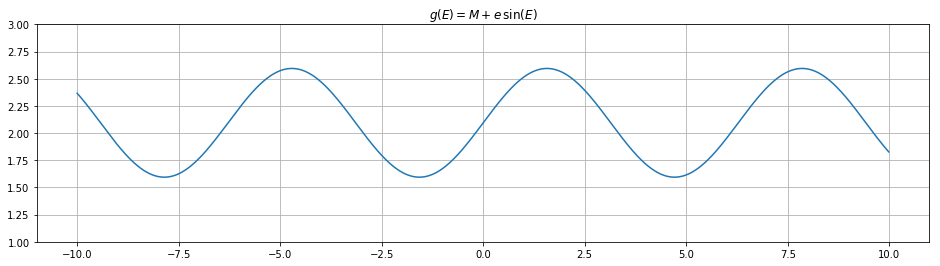

In [10]:
fig, ax = plt.subplots(figsize=(16, 4))
search_range = np.arange(-10, 10, 0.01)
ax.plot(search_range, g(search_range))
ax.set_title(r'$g(E) = M + e\,\sin(E)$')
ax.grid(True)
ax.axhline(y=0)
plt.ylim(1,3)
plt.show()

### Part 5. Find the solution of "$E$"

In [11]:
root = fixed_point(func = g , x_0 = 2 , tolerance = 1e-7 , max_iterations = 100 , report_history = False)

In [12]:
print('My estimation of root:', root)


My estimation of root: 2.423405402184932


---

### 3. An “ _exact_ ” formula for $E$ is known: $$E = M + 2 \sum_{m=1}^\infty \frac{1}{m} J_m(me)\,\sin(mM);$$ where $J_m(x)$ is the Bessel function of the first kind of order $m$. 

### Use this formula to compute $E$. How many terms are needed to produce the value obtained in "Q.2" until convergence?

### Part 0. Import package

In [13]:
from scipy.special import jn  # Bessel function

### Part 1. Define the function

For the convenience, we define the function $h(m)$ as
$$h(m) \triangleq \frac{2}{m} J_m(me)\,\sin(mM)$$

If we want to implement " _**Bessel function**_ " $J_m(x)$, we can call `jn(m,x)` in Python.

In [14]:
def h(m):
    return (2 / m) * jn(m , m * e) * np.sin(m * M)

In [15]:
# test the function of h
print('h(1) =', h(1))
assert round(h(1), 5) == 0.41962


h(1) = 0.41962127776423175


### Part 2. Find how many terms we need to achieve the result obtained Q.2 in a tolerance $10^{-7}$.

That is to find _num_terms_ such that

$$ \left|\ \text{root} - \left(M + \sum_{k=1}^{\text{num_terms}} h(k)\right)\ \right| < 10^{-7} $$

For example, the following cell shows the implmentation with only 1 term. 

In [16]:
LHS = root
RHS = M + h(1)
error = abs(LHS-RHS)
print('Left hand side is the estimation of root by the fixed-point method:', LHS)
print('Right hand side is the approximation by the formula in only 1 term:', RHS)
print('The error between LHS and RHS:', error)

Left hand side is the estimation of root by the fixed-point method: 2.423405402184932
Right hand side is the approximation by the formula in only 1 term: 2.514016380157427
The error between LHS and RHS: 0.09061097797249529


In [17]:
LHS = root
RHS = M + h(1)
num_terms = 1
tolerance = 1e-7

while (abs(LHS - RHS) >= tolerance):
    num_terms += 1
    RHS += h(num_terms)

In [18]:
print('Number of terms to approximate:', num_terms)


Number of terms to approximate: 23
